# Recurrent Neural Network (RNN)

## Sıralı Modeller (Sequence Models)
* Sıralı modeller, zamanla değişen verilere dayalı modellerdir. Örneğin, bir havaalanındaki yolcu sayısını ölçmek istediğimizde, bu yolcu sayısı zamanla değişen bir modele örnektir.
* Sıralı modeller, verilerin zamanla nasıl değiştiğini yakalayan modellerdir.
* Konuşma tanıma, doğal dil işleme (NLP) ve müzik oluşturma gibi alanlarda kullanılırlar.
* Ses kaydı alındıkça veriler zamanla akar ve zamanla değişen özelliklere sahiptir; örneğin ses frekansı.
* Apple'ın Siri ve Google'ın sesli arama gibi uygulamalar sıralı modellere örnektir.
* Sıralı modeller, zaman bileşenini içeren değişkenlere dayalıdır. (zaman var ve zamana bağlı değişken var)
* Duygu sınıflandırma (Sentiment classification) gibi uygulamalarda da kullanılırlar.

## Recurrent Neural Network
* yakın geçmişi hatırlar. gelecekte, geçmişi bağdaştırıp ileriyi tahmin edebilirler, sınıflandırabilirler.
* input'lardan önemli gördükleri şeyleri hatırlayabilirler. Bu gelecekle ilgili doğru bir tahmin yapmasını sağlar.
* bir hafızası var ve gelecekle ilgili tahmin yapabilir.
* diğer algoritmalara göre daha etkilidir.
* hidden layer'in içerisinde birden fazla node vardır. bu node'ların kendi kendini besleyen temporal loop'ları var. short memory, internal memory (iç hafıza) var
* temporal loop (zamansal döngü) kendini besler.
* kendini input ile besler, unutmaz. bir sonraki node'a ya da layer'a geçtiğinde önceden öğrendiği şey aklında kalır.

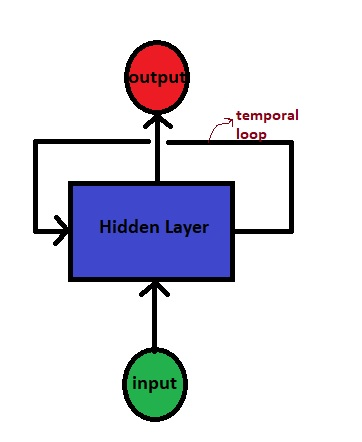

* Belleğe sahipler short term memory bir önceki node da olanları hatırlarlar. Eskiyi hatırlar.
* Mesela geçmişi hatırlamak neden önemli biz yaptıklarımızdan bir şeyler öğreniriz ve yeni öğrenilen şeyleri de eski öğrendiklerimizi üzerine kurarız. RNN'i de aynı mantıkta düşünebilirsiniz.
* geçmişi bildiğinden gelecekle ilgili tahmin yapabilir.

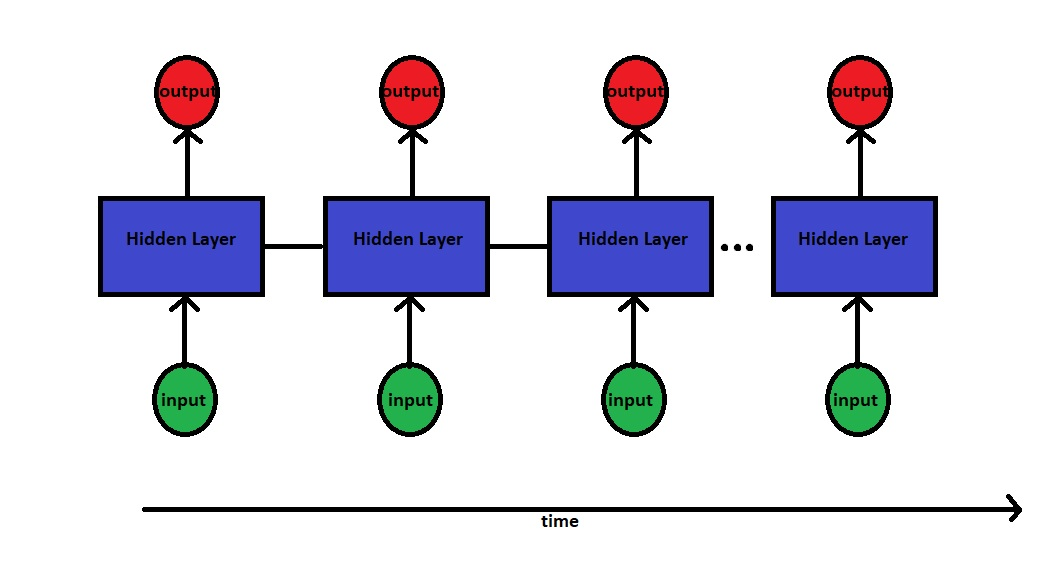

* input'u hidden layer'a verdiğimizde bir output verir.
* 1. hidden layer'da hatırlamam gereken şeyleri bir sonraki layer'a iletilir.
* 2. hidden layer hem yeni bir input alır hemde geçmişten gelen hatırlaması gereken şeyleri alır ve yeni bir output verir.
* ve burada akan bir zaman var

Örnek RNN yapılarına bakalım

* One to Many
    * Input bir resim, output o resimde yapılan cümle yani "Adam surf yapıyor"
    * 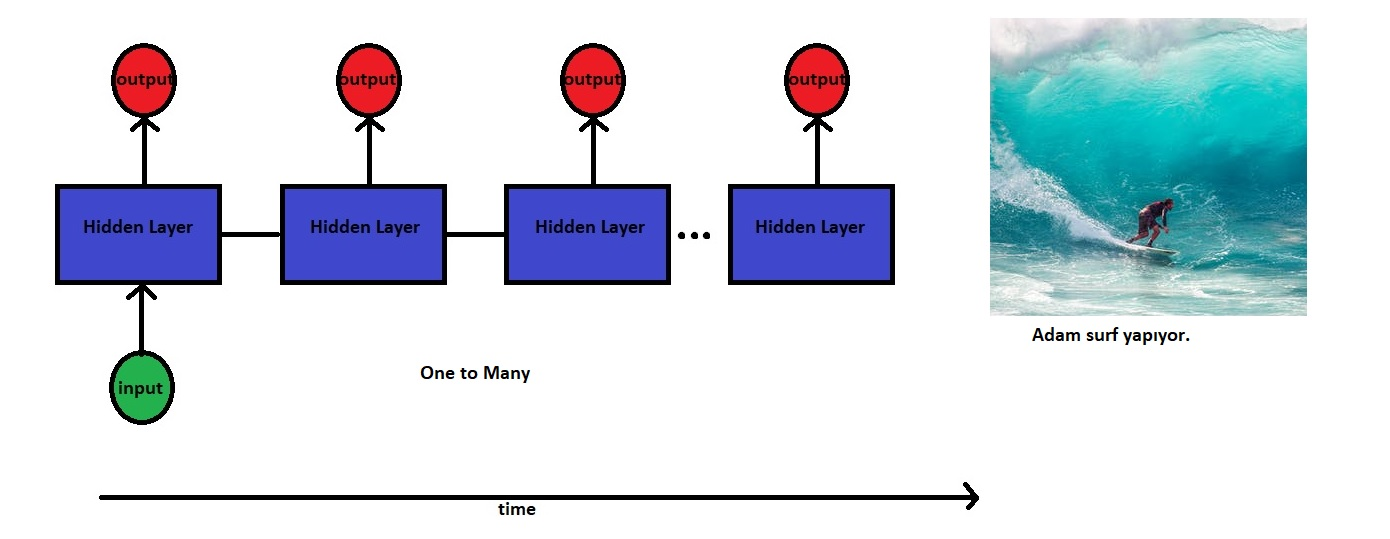
    * bir tane input var ve birden çok output var

* Many to One
    * Input bir cümle, output bir duygu mesela iyimser, neşeli gibi.
    * 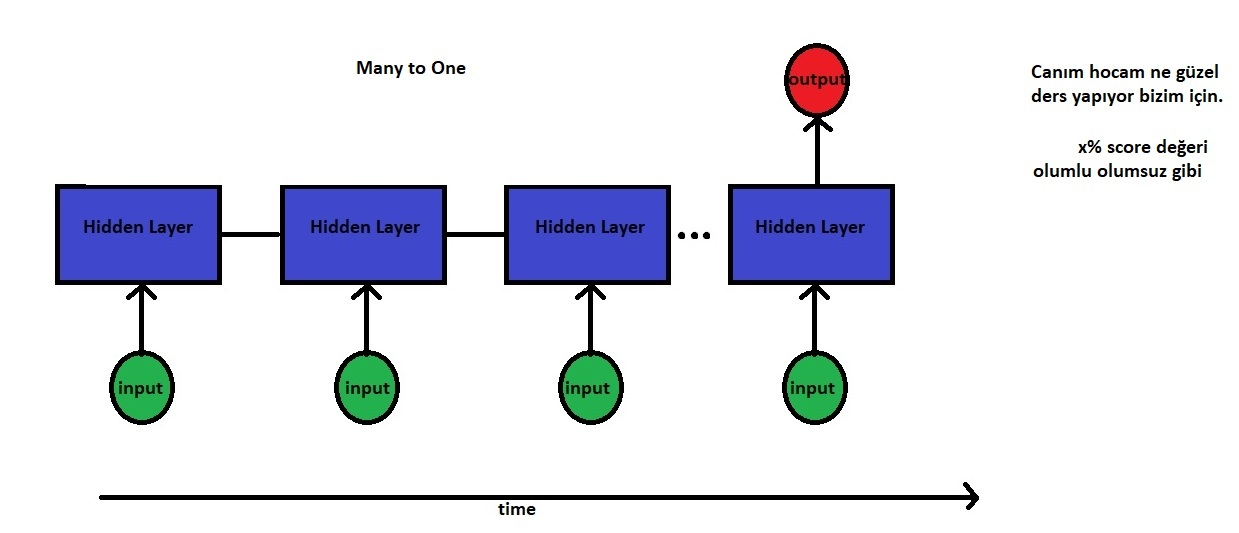
    * birden çok input var ve bir tane output var
    * örneğin output %90 olumlu bir cümledir.

* Many to Many
    * Mesela google translate kullanarak İngilizceden bir cümleyi Türkçe'ye translate etmek
    * 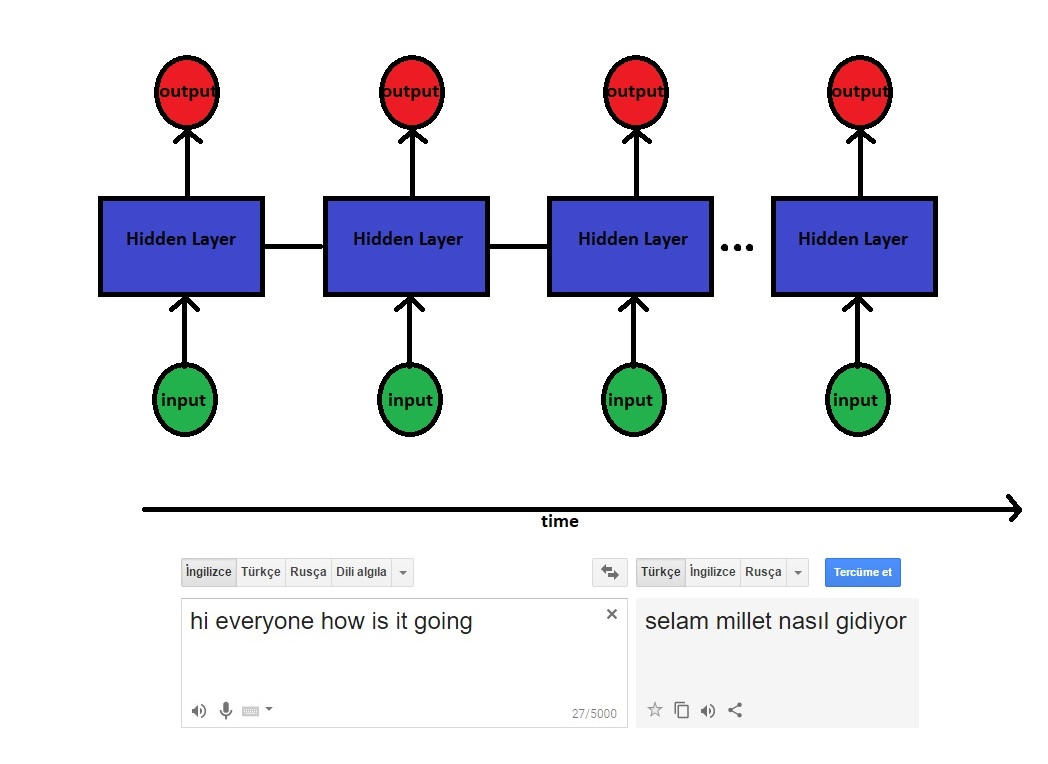
    * birden çok input var ve birden çok output var

* RNN short term memory'e sahip ama LSTM long term memory'e de sahip olabiliyor.
* RNN'i ANN yada CNN'den ayıran daha önce de belirttiğimiz gibi *memory*. Mesela "DATAI" diye bir stringimiz var ve biz 4. harfe geldik yani "A" harfine. ANN' e sorduğumuz zaman 4. harfi A olan bir kelimenin 5. harfi ne olabilir diye. ANN bilemez çünkü memory olmadığı için geçmiş harfleri yani "DAT" harflerini bilip "A" ile birleştirip daha sonra 5. harf "I" olabilir diyemez. Ama RNN tam olarak bunu söyleyebilir.
* cost'u minimum tutacak şekilde parametreleri güncellerim.
* Exploiding Gradients: Gradient'in çok büyük olması durumu. Gereksiz yere belli weightlere önem kazandırır. ve gereksiz şeyler öğrenilmiş olur. Bunun engellenmesi gerekir. LSTM bunu engeller
* Vanishing Gradients: Gradient'in çok küçük olması durumu. Yavaş öğrenir.
* Gradient, cost'a göre weight'lerde ki değişimdir, yani türevidir. (step(adım) olarak düşünülebilir eğer adımlar çok küçükse çok yavaş öğrenir)

RNN'de memory olduğundan zamana bağlı değişkenleri içeren modellerde tahmin ve sınıflandırma yapılabilir.

## Keras ile RNN

### Veri Seti

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# uyarıları kapattım
import warnings
warnings.filterwarnings("ignore")

In [2]:
# borsada gelecekle ilgili tahmin yapacağız
dataset_train = pd.read_csv("Stock_Price_Train.csv") # borsa
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
# open, borsanın açılış değeridir.
# values ile array'e çevirdim
train = dataset_train.loc[:, ["Open"]].values
train[:3]

array([[325.25],
       [331.27],
       [329.83]])

In [4]:
# Feature Scaling - Normalizasyon
from sklearn.preprocessing import MinMaxScaler

# verileri 0 ile 1 arasındaki değerlere eşitliyorum
scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train) # fit verileri 0 ile 1 arasındaki değerlere eşitler
# transform dönüştürür ve train_scaled değişkenine atar
train_scaled[:3]

array([[0.08581368],
       [0.09701243],
       [0.09433366]])

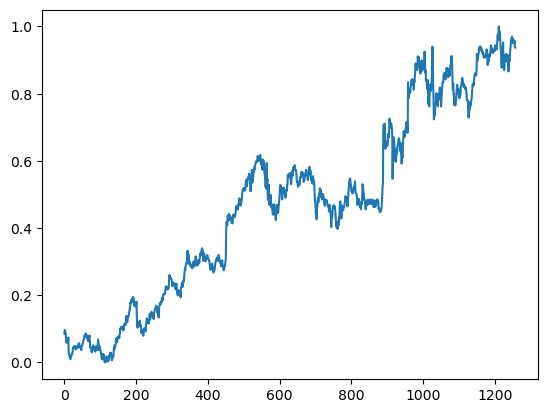

In [5]:
plt.plot(train_scaled)
plt.show()

In [6]:
# train veri setini x ve y olmak üzere 2'ye ayıralım
# x, input'lar
# y, tahmin(predict) edilecek değerler
X_train = [] # ilk 50 değeri al ve X_train içerisinde depola
y_train = [] # 51. değeri, örneği y_train içerisine at
# yani ilk 50 değere göre 51. değer tahmin edilir
# bu şekilde ilerler
timesteps = 50

for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0]) # [0:50, 0] -> 0. sütunun ilk 50 satırı
    y_train.append(train_scaled[i, 0]) # 0. sütunun 50. satırı yani 51. değer

X_train, y_train = np.array(X_train), np.array(y_train) # array'e çevirdim

In [7]:
X_train[:1]

array([[0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481]])

In [8]:
y_train[:1]

array([0.05214302])

* 1, 2, 3, 4, 5, 6, 7, 8, 9
* x_train: 1, 2, 3 - y_train: 4
* x_train: 2, 3, 4 - y_train: 5

In [9]:
X_train.shape # her satırda 50 değer vardır

(1208, 50)

In [10]:
y_train.shape

(1208,)

In [11]:
# reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train[:2]

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        [0.09156187],
        [0.07984225],
        [0.0643277 ],
        [0.0585423 ],
        [0.06568569],
        [0.06109085],
        [0.06639259],
        [0.0614257 ],
        [0.07474514],
        [0.02797827],
        [0.02379269],
        [0.02409033],
        [0.0159238 ],
        [0.01078949],
        [0.00967334],
        [0.01642607],
        [0.02100231],
        [0.02280676],
        [0.02273235],
        [0.02810849],
        [0.03212665],
        [0.0433812 ],
        [0.04475779],
        [0.04790163],
        [0.0440695 ],
        [0.04648783],
        [0.04745517],
        [0.04873875],
        [0.03936305],
        [0.04137213],
        [0.04034898],
        [0.04784582],
        [0.04325099],
        [0.04356723],
        [0.04286033],
        [0.04602277],
        [0.05398467],
        [0.05738894],
        [0.05714711],
        [0.05569611],
        [0.04421832],
        [0.04514845],
        [0

In [12]:
X_train.shape

(1208, 50, 1)

### RNN Modelini Oluşturalım

In [13]:
from keras.models import Sequential # bir neural network yapısı
from keras.layers import Dense # layer
from keras.layers import SimpleRNN
from keras.layers import Dropout # overfitting aşırı öğrenmeyi engeller

In [14]:
# bir neural network yapısı oluşturdum
regressor = Sequential()

In [15]:
# oluşturulan neural network yapısının içerisine eklenir

In [16]:
# layer 1, 50 node
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) # Dropout, regularization yöntemlerindendi

In [17]:
# layer 2
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
# layer 3
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

In [19]:
# layer 4
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

In [20]:
# output layer
regressor.add(Dense(units = 1))

In [21]:
# RNN
regressor.compile(optimizer = "adam", loss="mean_squared_error")

In [22]:
# train set ile RNN modelini eğitiyorum
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 1s 14ms/step - loss: 0.4168
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.2696
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 0.2244
Epoch 4/100
38/38 [==============================] - 1s 15ms/step - loss: 0.1654
Epoch 5/100
38/38 [==============================] - 1s 15ms/step - loss: 0.1158
Epoch 6/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0945
Epoch 7/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0798
Epoch 8/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0726
Epoch 9/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0598
Epoch 10/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0524
Epoch 11/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0425
Epoch 12/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0378
Epoch 13/100
38/38 [=====

### Tahmin

In [23]:
dataset_test = pd.read_csv("Stock_Price_Test.csv")
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [24]:
real_stock_price = dataset_test.loc[:, ["Open"]].values # values ile numpy array'e çevirdim
real_stock_price[:5]

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ]])

In [25]:
# train veri setini 0 ile 1 arasında ölçeklendirmek için kullandığım scaler metodunu kullanacağım

In [26]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)
dataset_total.shape

(1278,)

In [27]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) # min-max scaler
inputs[:5]

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494]])

In [28]:
inputs.shape

(70, 1)

In [29]:
# tahmin

In [30]:
X_test = []

for i in range(timesteps, 70):
    X_test.append(inputs[i - timesteps:i, 0])  # timesteps ile X_test oluşturulur
    # X_test'in içerisine timesteps'e göre veriler eklenir
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# tahmin
# X_test'e göre tahminler yapılacak
predicted_stock_price = regressor.predict(X_test)

# 0 ile 1 arasında olan tahmin edilen değerlerin inverse_transform ile 
# ölçeklendirilmeden önceki gerçek değerleri bulunur.
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 152ms/step


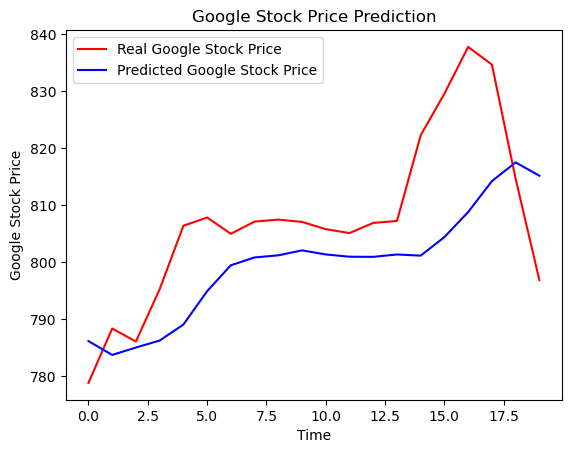

In [31]:
# görselleştirelim
plt.plot(real_stock_price, color="red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label ="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

kötü bir tahmin yapılmış, iki grafik arasında benzerliğin çok az olduğu görülür. epoch sayısını arttırırsak modelin karmaşıklığı artar ve daha güzel bir sonuç verir.

## Long Short Term Memory (LSTM) Nedir

* LSTM, RNN'in özelleşmiş bir yapısıdır.
* LSTM'de RNN'den farklı olarak "long term memory" vardır.
* RNN yakın geçmişini saklar, LSTM ise uzun bir memory sahiptir dolayısıyla pek çok bilgiyi saklıyabilir.

LSTM Architecture:
* X: scaling of information, okların X noktasında birleşip birleşmeyeceğini gösterir.
* +: adding information, okların + noktasında toplanıp toplanmayacağını ifade eder.
* Eğer 1. ok için 0 ile çarpma işlemi uygulanıyorsa, hiçbir zaman dahil edilmeyecektir. Ancak 0 ile toplama (+) işlemi uygulansaydı, dahil edilmemek gibi bir durum mümkün olmayacaktı.
* Sigmoid layer: Sigmoid memory den bir şeyi hatırlamak için yada unutmak için kullanılır. 1 yada 0'dır.
* Tanh: Aktivasyon fonksiyonu olan tanh, vanishing gradient (yavaş öğrenme - çok küçük gradient) sorununu çözmeye yardımcı olur. Bu sorun, model parametrelerini güncellerken türev alındığında ortaya çıkar. Tanh fonksiyonunun türevi, hemen sıfıra yaklaşmaz. Bu nedenle belirli bir süre boyunca öğrenme hızı yavaşlamaz ve bu, gradyanın çok hızlı bir şekilde sıfıra yaklaşmasını engeller.
* h(t-1): output of LSTM unit, bir önceki LSTM unit'den(hidden layer) gelen output değeri
* c(t-1): memory from previous LSTM unit, bir önceki unit'ten gelen memory
* X(t): input
* c(t): new updated memory, güncel memory
* h(t): output, LSTM unit yani node'un çıktısı
* From c(t-1) to c(t) is memory pipeline. or only memory. (memory'e eklemeler ve çıkartmalar yapılır, güncellenir.)
* Oklar vektör.
* h(t-1) ile X(t) birleşmiyor parallel iki yol (iki şeritli yol) olarak düşünebilirsiniz. (+ ve x noktalarında oklar birleşir ve yol tek şeride düşer)
* 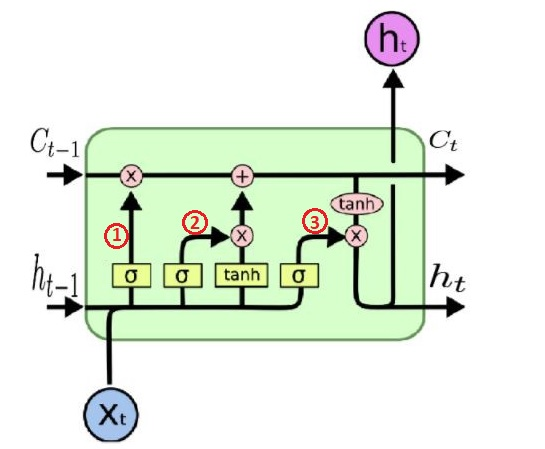
* 1) Forget gate:(unutma kapısı) Gelen bilginin unutulup unutulmayacağına karar verir. input olarak X(t) ve h(t-1) alır ve bir sigmoid layer'a sokar eğer bu sigmoid layer 1 ise memory kısmına iletilir. eğer 0 ise geçmişi unutmuş olur.
* 2) Input gate: Hangi bilginin memory de depolanıp depolanmayacağına karar verir. input olarak X(t) ve h(t-1) alır bu inputlar sigmoid'den geçer, tanh ile birleşir ve eğer sigmoid 0 ise memory'e eklenmez, 1 ise bilgi memory'de depolanır.
* 3) Output gate: Hangi bilginin output (ht) olup olmayacağına karar verir.

### Keras ile LSTM

#### Veri Seti

In [35]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import math
# keras
from keras.models import Sequential # neural network yapısını oluşturulur
from keras.layers import Dense # layer
from keras.layers import LSTM
# sklearn
from sklearn.preprocessing import MinMaxScaler # normalizasyon için
from sklearn.metrics import mean_squared_error

In [37]:
# hava alanındaki yolcu sayısı
# yıllara ve aylara göre belirlenmiş yolcu sayıları var
data = pd.read_csv("international-airline-passengers.csv", skipfooter = 5)
# skipfooter ile son 5 örneğini hatalı olduğunu için almadım
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


1949 yılında 1. ayda 112 tane passenger(yolcu) geçmiş

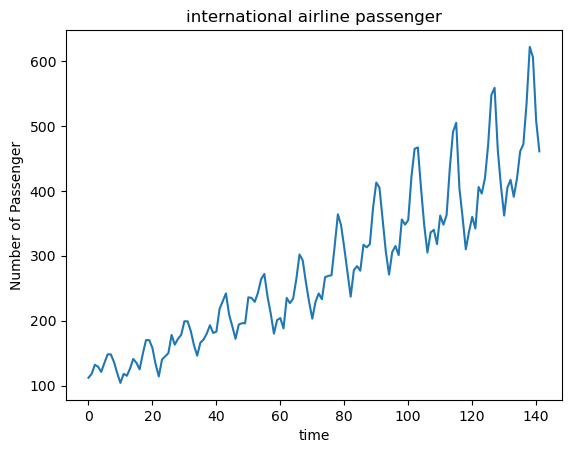

In [38]:
dataset = data.iloc[:,1].values # bütün satır 1. sütun
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

In [40]:
data.head(12)

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


sezona bağlı değişiklik göstermiştir. 1949 yılına baktığımızda küçük yükselişler 3. aya gelir. en fazla yolcu sayısı 148'dir ve ayın 7 ve 8'inde yani yaz aylarındadır. dolayısıyla yaz mevsiminde gidilebilecek bir tatil bölgesindeki havaalanıdır.

#### Veri Ön İşleme

In [41]:
# veriyi keras ile kullanmak için hazırlayacağız

In [42]:
# yeniden boyutlandırma
dataset = dataset.reshape(-1,1) # (142,) -> (142, 1)
# tip dönüşümü
dataset = dataset.astype("float32")
dataset.shape

(142, 1)

In [43]:
# veriyi 0 ile 1 arasındaki değerlere dönüştürüyorum
# bütün neural networklerde yapılır
# hem hızı arttırır hemde networkün daha iyi sonuçlar vermesini sağlar
scaler = MinMaxScaler(feature_range =(0,1))
dataset = scaler.fit_transform(dataset)

In [44]:
# train - test split
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size

train = dataset[0:train_size, :]
test = dataset[train_size:len(dataset), :]

print("train size: {}, test size: {}".format(len(train), len(test)))

train size: 71, test size: 71


In [46]:
# veri setini oluşturuyorum
time_stemp = 10

In [47]:
# train veri seti
dataX = []
dataY = []

for i in range(len(train) - time_stemp - 1):
    a = train[i:(i + time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])

trainX = numpy.array(dataX)
trainY = numpy.array(dataY)

In [48]:
# test veri seti
dataX = []
dataY = []

for i in range(len(test) - time_stemp - 1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i+time_stemp, 0])
    
testX = numpy.array(dataX)
testY = numpy.array(dataY)

In [49]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [50]:
trainX.shape

(60, 1, 10)

In [51]:
testX.shape

(60, 1, 10)

#### LSTM

In [52]:
# model
# tek layer, 10 LSTM bloğu
model = Sequential() # neural network yapısını oluşturuyorum
model.add(LSTM(10, input_shape = (1, time_stemp))) # 10 LSTM neuron(block)
model.add(Dense(1)) # output
model.compile(loss="mean_squared_error", optimizer = "adam")

In [53]:
# train
model.fit(trainX, trainY, epochs = 50, batch_size =1)

Epoch 1/50
60/60 [==============================] - 1s 779us/step - loss: 0.0182
Epoch 2/50
60/60 [==============================] - 0s 683us/step - loss: 0.0049
Epoch 3/50
60/60 [==============================] - 0s 611us/step - loss: 0.0040
Epoch 4/50
60/60 [==============================] - 0s 616us/step - loss: 0.0040
Epoch 5/50
60/60 [==============================] - 0s 636us/step - loss: 0.0035
Epoch 6/50
60/60 [==============================] - 0s 622us/step - loss: 0.0036
Epoch 7/50
60/60 [==============================] - 0s 658us/step - loss: 0.0037
Epoch 8/50
60/60 [==============================] - 0s 670us/step - loss: 0.0031
Epoch 9/50
60/60 [==============================] - 0s 639us/step - loss: 0.0030
Epoch 10/50
60/60 [==============================] - 0s 683us/step - loss: 0.0030
Epoch 11/50
60/60 [==============================] - 0s 629us/step - loss: 0.0027
Epoch 12/50
60/60 [==============================] - 0s 653us/step - loss: 0.0027
Epoch 13/50
60/60 [======

#### Tahmin

In [54]:
# tahmin
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 986us/step


In [55]:
# 0 ile 1 arasında değerlere çevirdiğim için inverse transform ile
# gerçek değerlerine döndürüyorum
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [56]:
# mean squared error - hata değerleri
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test Score: %.2f RMSE" % (testScore))

Train Score: 19.37 RMSE
Test Score: 43.48 RMSE


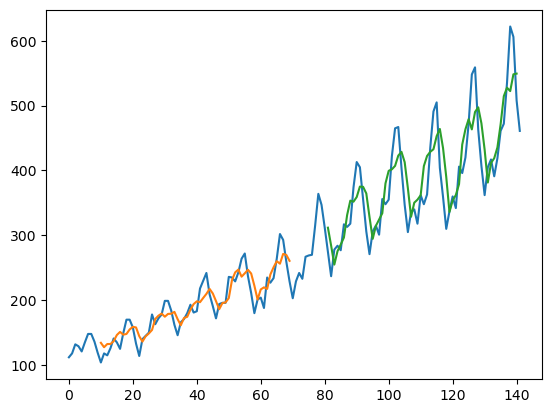

In [58]:
# görselleştirme

# shifting train
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict) + (time_stemp*2)+1: len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

- Mavi: Orijinal veri (dataset).
- Turuncu: Eğitim veri kümesi üzerinde yapılan tahminler (trainPredict).
- Yeşil: Test veri kümesi üzerinde yapılan tahminler (testPredict) (gelecekle ilgili tahminler yapılmıştır).
- Zirve noktasının altında tahminlerde bulunmuş (çok iyi tahminler yapılmadığı görülür), ancak RNN'ye göre daha iyi tahminlerde bulunmuştur.
- Modeldeki artışlar ve azalmalar taklit edilmiştir.